In [23]:
import pandas as pd

df = pd.read_csv('Document from George.csv')
df['Order date'] = pd.to_datetime(df['Order date'])
df['Delivery date'] = pd.to_datetime(df['Delivery date'])
#changed the dates to python datetime
df['time_diff_days'] = ( df['Delivery date'] - df['Order date']) / pd.Timedelta(days=1)

#difference between the order and delivery in minutes
df['time_diff'] = ( df['Delivery date'] - df['Order date'])
df

,Unnamed: 0,Warehouse,Order date,Delivery date,Customer,Zipcode,time_diff_days,time_diff
0,0,Butler,2021-02-09 10:49:00,2021-02-11 12:40:00,12392,15017,2.077083,2 days 01:51:00
1,1,Butler,2021-02-12 08:59:00,2021-02-15 16:12:00,12392,15017,3.300694,3 days 07:13:00
2,2,Washington,2021-02-12 09:01:00,2021-02-15 16:15:00,12392,15017,3.301389,3 days 07:14:00
3,3,McKees Rocks,2021-02-13 07:45:00,2021-02-15 16:16:00,12392,15017,2.354861,2 days 08:31:00
4,5,Butler,2021-02-15 21:58:00,2021-02-16 16:50:00,12392,15017,0.786111,0 days 18:52:00
...,...,...,...,...,...,...,...,...
9475,10472,Washington,2022-11-12 18:43:00,2022-11-12 19:01:00,288530,15217,0.012500,0 days 00:18:00
9476,10473,Pittsburgh Mills,2022-11-12 19:48:00,2022-11-12 19:48:00,227364,15112,0.000000,0 days 00:00:00
9477,10474,Butler,2022-11-12 20:02:00,2022-11-12 20:02:00,270991,15216,0.000000,0 days 00:00:00
9478,10475,Pittsburgh Mills,2022-11-12 20:09:00,2022-11-12 20:09:00,98234,15217,0.000000,0 days 00:00:00


# 1. total number of orders from each zip code permonth

In [2]:
pd.options.display.max_columns = 4000
out = pd.crosstab(df['Zipcode'], pd.PeriodIndex(df['Order date'], freq='M'))
out

col_0,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11
Zipcode,,,,,,,,,,,,,,,,,,,,,,
15007,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15017,8,4,6,3,14,5,3,4,2,0,4,21,18,17,17,18,19,16,15,6,10,2
15031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44509,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
44511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0
44512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4


# 2. percentage of customer returns within a week, month and year

In [28]:
vf=df[df.Customer.duplicated(keep=False)]

sr = vf.groupby('Customer').head(2)

out = (vf.groupby('Customer', as_index=False)['Order date'].agg(lambda x: (x.iloc[-1] - x.iloc[0]).total_seconds()/ 60 ).query('`Order date` != 0'))
week = []
month = []
year = []
more_time = []
col = out['Order date'].tolist()
for i in col:
    if 0 <= i <= 10080:#week
        week.append(i)
    elif 10081 <= i <= 43800:#month
        month.append(i)
    elif 43801 <= i <= 525600:#year
        year.append(i)
    elif  i > 525600:#year
        more_time.append(i)
    
all_customers = len(df.Customer.unique())
return_customer  = len(out)
print('percentage of overall return customers',round(return_customer/all_customers *100),'%')
print('percentage of customers that returned within a week',round(len(week)/all_customers *100),'%')
print('percentage of customers that returned within a month',round(len(month)/all_customers *100),'%')
print('percentage of customers that returned within a year',round(len(year)/all_customers *100),'%')
print('percentage of customers that returned over a year',round(len(more_time)/all_customers *100),'%')

percentage of overall return customers 55 %
percentage of customers that returned within a week 8 %
percentage of customers that returned within a month 10 %
percentage of customers that returned within a year 32 %
percentage of customers that returned over a year 5 %


In [22]:
sr


,Unnamed: 0,Warehouse,Order date,Delivery date,Customer,Zipcode,time_diff_minutes,time_diff
0,0,Butler,2021-02-09 10:49:00,2021-02-11 12:40:00,12392,15017,2.077083,2 days 01:51:00
1,1,Butler,2021-02-12 08:59:00,2021-02-15 16:12:00,12392,15017,3.300694,3 days 07:13:00
8,17,McKees Rocks,2021-02-23 21:57:00,2021-02-24 13:38:00,11565,15317,0.653472,0 days 15:41:00
9,24,Washington,2021-02-26 23:09:00,2021-03-01 15:22:00,13306,15301,2.675694,2 days 16:13:00
10,25,McKees Rocks,2021-02-27 08:10:00,2021-03-03 13:00:00,13306,15301,4.201389,4 days 04:50:00
...,...,...,...,...,...,...,...,...
9430,10427,Washington,2022-11-11 12:25:00,2022-11-11 12:25:00,171515,15234,0.000000,0 days 00:00:00
9446,10443,Pittsburgh Mills,2022-11-11 21:36:00,2022-11-11 21:36:00,258930,15212,0.000000,0 days 00:00:00
9447,10444,Butler,2022-11-11 21:36:00,2022-11-11 21:36:00,258930,15212,0.000000,0 days 00:00:00
9460,10457,Pittsburgh Mills,2022-11-12 10:05:00,2022-11-12 10:05:00,275509,15367,0.000000,0 days 00:00:00


# 3. percentage of customer that never came back

In [31]:
sf = df.drop_duplicates(subset = 'Customer',keep = False)

print('percentage of customers that never came back',round(len(sf) / len(df.Customer.unique()) * 100),'%')
#percentage of customers that only ordered once

percentage of customers that never came back 45 %


In [33]:
vf
af = df[df.Customer.duplicated(keep=False)]
print('average delivery time for customers that came back',round(vf.time_diff_days.mean(),1),'days')

average delivery time for customers that came back 3.2 days


In [34]:
print('average delivery time for customers that never came back',round(sf.time_diff_days.mean(),1),'days')

average delivery time for customers that never came back 3.1 days


In [250]:
print("there isn't much correlation because the average delivery time for customers that returned is almost the same as those that didn't")

there isn't much correlation because the average delivery time for customers that returned is almost the same as those that didn't


# 4. how fast do orders get delivered by zipcode

## average delivery time for each zipcode

In [51]:
pd.options.display.max_columns = 4000
wf = df.groupby('Zipcode')['time_diff_days'].mean().round(0)
wf = pd.DataFrame(wf)
print('the average delivery time is in days')


import numpy as np
wf['time_diff_days'] = np.where(wf['time_diff_days'] == 0.0,'less than a day', wf['time_diff_days'])
wf


the average delivery time is in days


,time_diff_days
Zipcode,
15007,2.0
15010,32.0
15017,2.0
15031,1.0
15035,3.0
...,...
44509,6.0
44511,8.0
44512,6.0


## how fast do orders get delivered by zipcode per month

In [318]:
a = df.groupby([df.Zipcode,df['Order date'].dt.month])['time_diff_minutes'].mean()
b = pd.DataFrame(a)
c = b.reset_index()
d = c.rename(columns = {'Order date':'month','time_diff_minutes':'average time to deliver'})
d

,Zipcode,month,average time to deliver
0,15007,11,2568.000000
1,15010,10,46319.000000
2,15017,1,4092.285714
3,15017,2,3572.538462
4,15017,3,3344.047619
5,15017,4,3506.260870
6,15017,5,4051.523810
7,15017,6,3102.606061
8,15017,7,3716.619048
9,15017,8,2989.555556


# 5. from what warehouse do each zipcode have the most deliveries

In [268]:


s = df.groupby('Zipcode')['Warehouse'].apply(lambda x: x.value_counts().index[0]).reset_index()
s

,Zipcode,Warehouse
0,15007,Boardman
1,15010,Beaver Falls
2,15017,Washington
3,15031,Washington
4,15035,Pittsburgh Mills
5,15044,Washington
6,15055,Pittsburgh Mills
7,15057,Washington
8,15063,Washington
9,15068,Beaver Falls


# 6. how fast does each zipcode grow with number of orders 

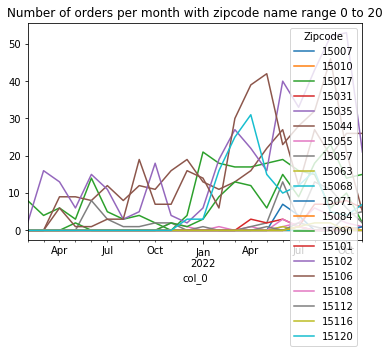

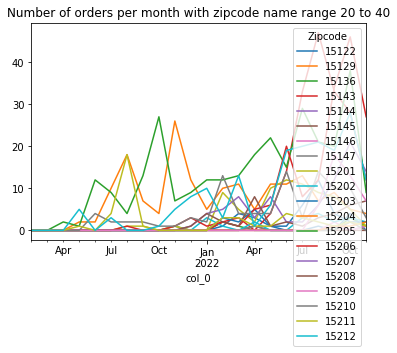

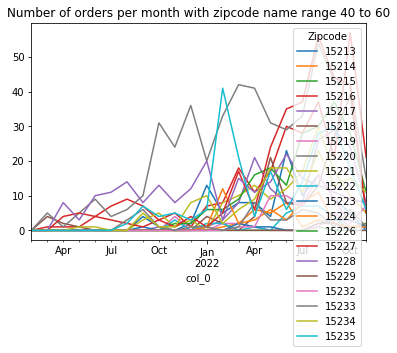

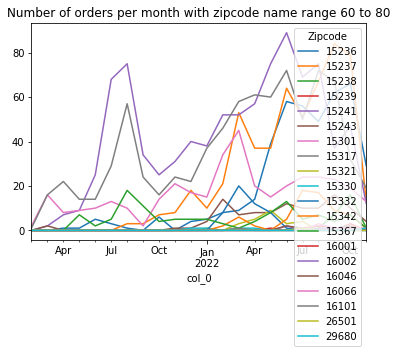

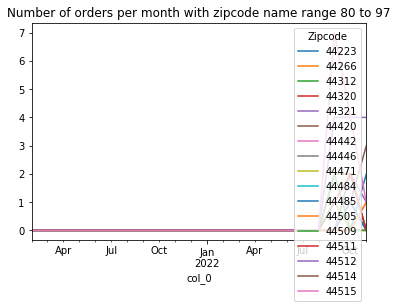

In [145]:
hil = out.transpose()
hil20 = hil.iloc[:, 0:20]
hil40 = hil.iloc[:, 20:40]
hil20.plot(title = 'Number of orders per month with zipcode name range 0 to 20')
hil40.plot(title = 'Number of orders per month with zipcode name range 20 to 40')
hil60 = hil.iloc[:, 40:60]
hil80 = hil.iloc[:, 60:80]
hil60.plot(title = 'Number of orders per month with zipcode name range 40 to 60')
hil80.plot(title = 'Number of orders per month with zipcode name range 60 to 80')
hil97 = hil.iloc[:, 80:]
hil97.plot(title = 'Number of orders per month with zipcode name range 80 to 97')

# 7. is there a season factor

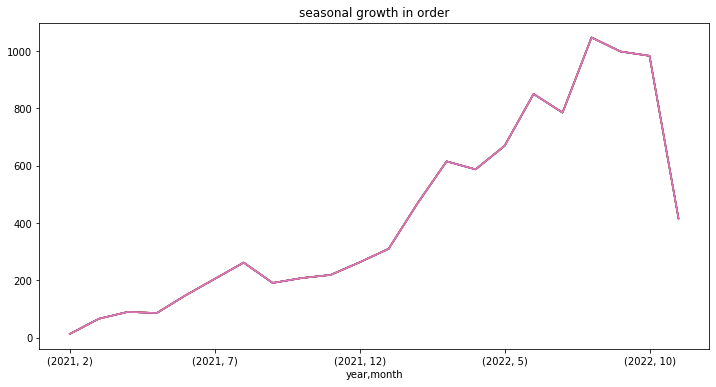

In [152]:
qf = df.groupby([df['Order date'].dt.year.rename('year'), df['Order date'].dt.month.rename('month')]).agg({'count'})
qf.plot(legend=False,title = 'seasonal growth in order', figsize=(12,6))



# 8. from which warehouse do orders get delivered faster

In [116]:
wf = df.groupby('Warehouse')['time_diff_minutes'].mean()
wf = pd.DataFrame(wf)
wf = wf.sort_values(by=['time_diff_minutes'], ascending=True)
wf.head(7)

,time_diff_minutes
Warehouse,
McKees Rocks,3672.343884
Washington Big Box,3775.333333
BD to MR,3965.000000
Washington,4091.032445
Mckees Rocks,4337.921739
Pittsburgh Mills,4513.388802
Butler,4796.580600
